<a href="https://colab.research.google.com/github/ravishnirala/CODSOFT/blob/main/CODSOFT_TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK4: SALES PREDICTION USING PYTHON

   AUTHOR: RAVISH KUMAR

   BATCH:  AUGUST A71

   DOMAIN: DATA SCIENCE

   AIM:    Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.


In [ ]:
# Importing some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Importing dataset
df=pd.read_csv('/content/drive/MyDrive/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape


(200, 4)

# Preprocessing the data

In [ ]:
#Checking the null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Hence there is not any null values

In [ ]:
# Checking the statistics visualization
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


***
 From above statistic I analysize that:

Avg expensive spent highest on the TV that is 147

Avg expensive spent lowest on the Radio is 23.264

Max sales is 27 and Min sales is 1.6
 ***

*
Now I am visualizing the dataset with the help of sns library *

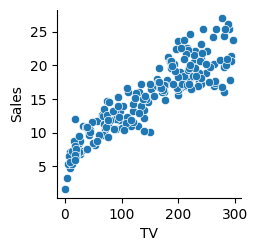

In [ ]:
sns.pairplot(df,x_vars='TV',y_vars='Sales',kind='scatter')

*here I obserbed that when TV ads are increasing the sale data also increasing.*

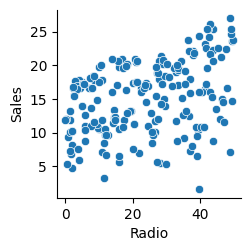

In [ ]:
sns.pairplot(df,x_vars='Radio',y_vars='Sales',kind='scatter')

here the radio data is unpredictable

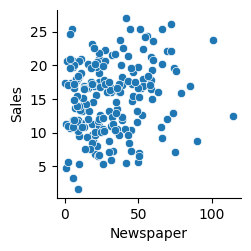

In [ ]:
sns.pairplot(df,x_vars='Newspaper',y_vars='Sales',kind='scatter')

here Newspaper data is also unpredictable

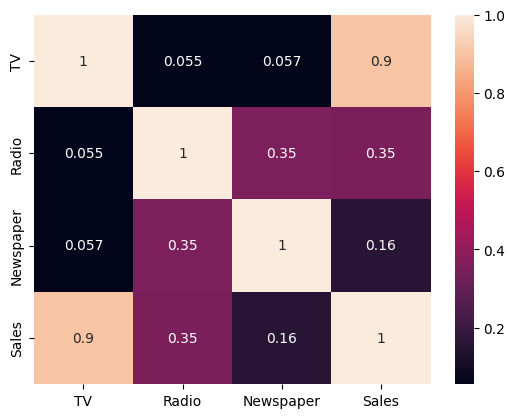

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Observation is that:

1 represent positive relation

0 represent no  relation

but here the TV data is highly correlated with sales data that means it is a bit positive related

# Spliting the dataset into train set and test set by importing the train_test_split

In [ ]:
# Input value
x=df[['TV','Radio','Newspaper']]
# Target value
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape

(160, 3)

In [ ]:
y_train.shape

(160,)

* Here the x_train take 160 rows and 50 column for training phase.   
   And y_train take 160 rows  for target value.
*

In [ ]:
x_test.shape

(40, 3)

In [ ]:
y_test.shape

(40,)

In [ ]:
print(x_train)

        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]


In [ ]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


# **Training the model by using the linear regression **

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
result=model.predict(x_test)

In [ ]:
result

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [ ]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,16.5
45,16.1


In [ ]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [ ]:
model.intercept_

4.714126402214127

In [ ]:
# To understand the performance of the model by comparing the predicted values with the actual values
mse=mean_squared_error(y_test,result)
r2=r2_score(y_test,result)
print('Mean squared error:',mean_squared_error(y_test,result))
print('R2 score:',r2_score(y_test,result))


Mean squared error: 2.9077569102710896
R2 score: 0.9059011844150826


In [ ]:
0.05450927*116+4.714126402214127

11.037201722214128

Text(0.5, 1.0, 'Actual vs Predicted Sales')

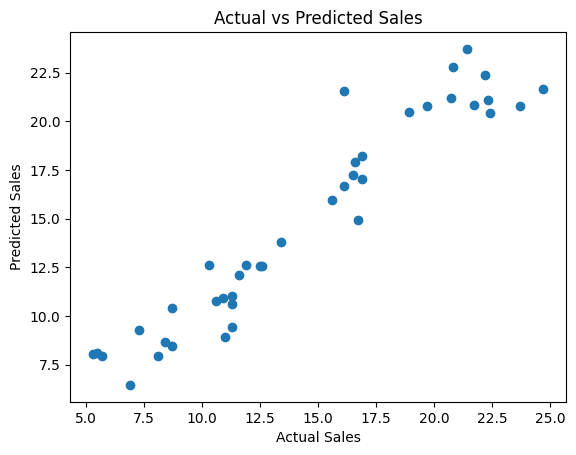

In [ ]:
#plotting the regression graph between the Actual vs Predicted sales
plt.scatter(y_test,result)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

In [ ]:

a=4.714126402214127+0.05450927*x_test['TV']
a

,TV
95,13.615490
15,15.365238
30,20.679892
158,5.351885
128,16.722519
115,8.807773
69,16.531736
170,7.439590
174,16.836988
45,14.258700


Text(0, 0.5, 'Sales')

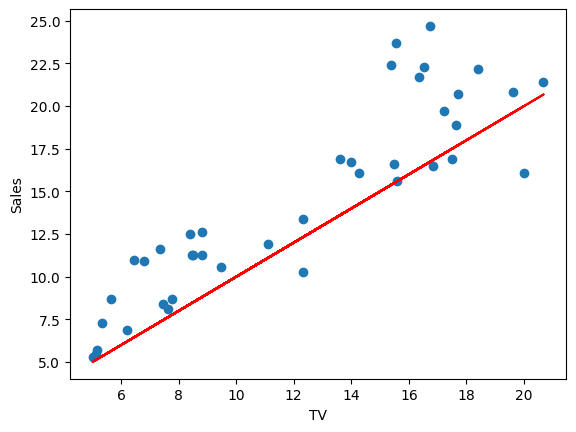

In [ ]:
#Plotting regression line
plt.scatter(a,y_test)
plt.plot(a,4.714126402214127+0.05450927*x_test['TV'],'r')
plt.xlabel('TV')
plt.ylabel('Sales')

In [ ]:
b=4.714126402214127+0.10094536*x_test['Radio']
b

,Radio
95,7.904000
15,9.529220
30,7.570880
158,8.439010
128,9.660449
115,8.247214
69,9.145628
170,5.885093
174,5.057341
45,6.985397


Text(0.5, 0, 'Radio')

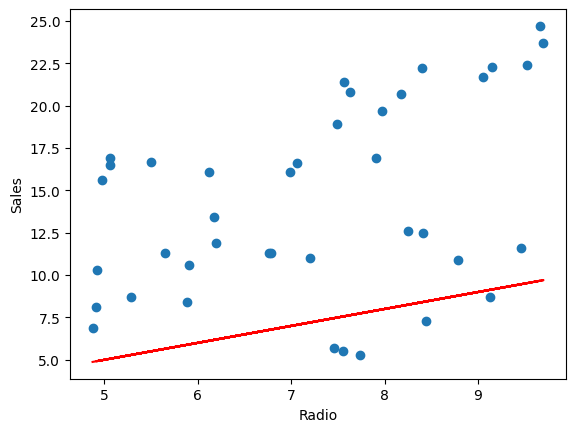

In [ ]:
plt.scatter(b,y_test)
plt.plot(b,4.714126402214127+0.10094536*x_test['Radio'],'r')
plt.ylabel('Sales')
plt.xlabel('Radio')

In [ ]:
c=4.714126402214127+0.00433665*x_test['Newspaper']
c

,Newspaper
95,4.943535
15,4.943535
30,4.901470
158,4.910143
128,4.728004
115,4.942668
69,4.832083
170,4.793921
174,4.770937
45,4.850731


Text(0.5, 0, 'Newspaper')

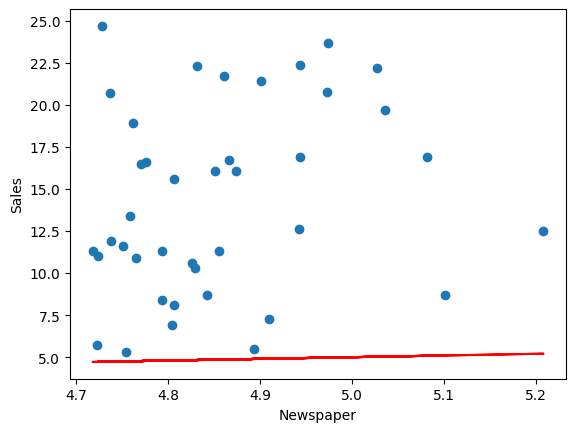

In [ ]:
plt.scatter(c,y_test)
plt.plot(c,4.714126402214127+0.00433665*x_test['Newspaper'],'r')
plt.ylabel('Sales')
plt.xlabel('Newspaper')

In [ ]:
# Fitting the model only Radio data
model.fit(x_train[['Radio']],y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test[['Radio']])

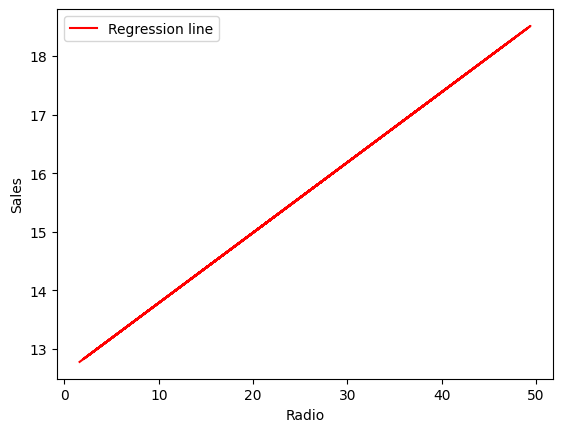

In [ ]:
#Plotting the regression line based on the y_pred
plt.plot(x_test['Radio'], y_pred, color='red', label='Regression line')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

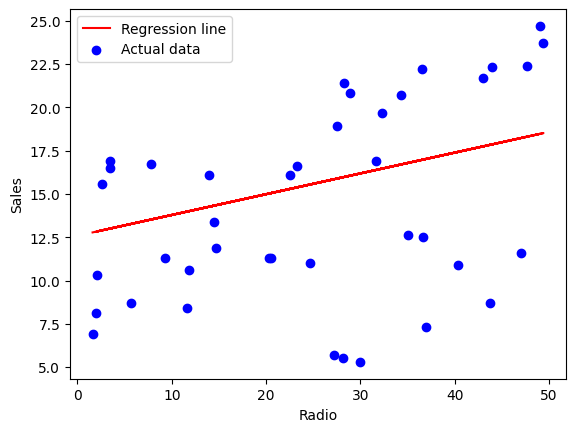

In [ ]:
#Plotting regression line
plt.plot(x_test['Radio'], y_pred, color='red', label='Regression line')
plt.scatter(x_test['Radio'], y_test, color='blue', label='Actual data',)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()


# **CONCLUSION:

HERE I HAVE CONCLUDE THAT THE MODEL IS WORKING WELL FOR THE ALL DATA **